<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/Iris_Label_Encoder_Isolation_Forest_PPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ppscore


  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=2f284c8f61484fee4aea76e1d7fa7da27009e69de6d868003873098d4b1af4dd
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import ppscore as pps


In [ ]:
df=pd.read_csv("Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Label Encoder

In [ ]:
y = df["Species"]

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print("\nLabel Encoded Target Variable:")
print(y_encoded)


Label Encoded Target Variable:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df['Species'] = y_encoded

Label encoding is typically applied to convert categorical labels into numerical format, particularly when using machine learning models that require numerical inputs. In the context of the Iris dataset, the 'Species' column is categorical.

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['isolation_forest_score'] = isolation_forest.fit_predict(df)

# Display the DataFrame with the Isolation Forest scores
print("DataFrame with Isolation Forest Scores:")
df

DataFrame with Isolation Forest Scores:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,isolation_forest_score
0,1,5.1,3.5,1.4,0.2,0,1
1,2,4.9,3.0,1.4,0.2,0,1
2,3,4.7,3.2,1.3,0.2,0,1
3,4,4.6,3.1,1.5,0.2,0,1
4,5,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


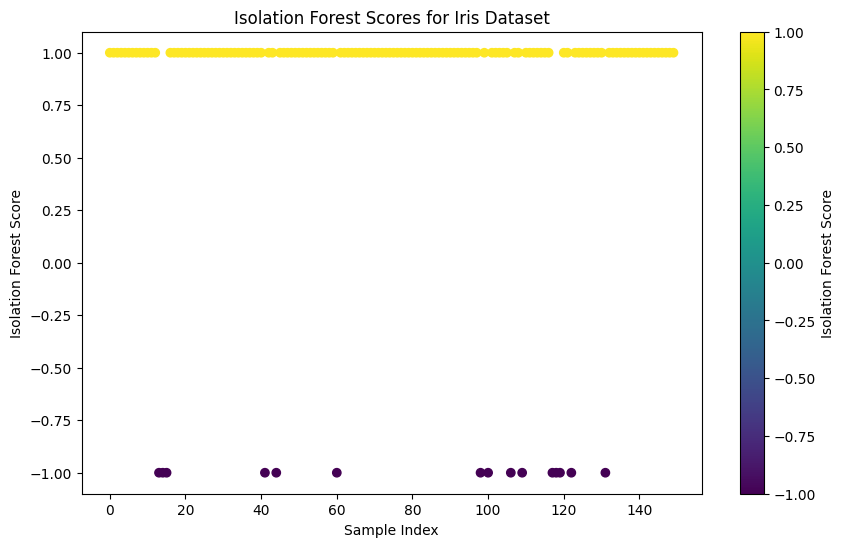

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['isolation_forest_score'], c=df['isolation_forest_score'], cmap='viridis')
plt.title('Isolation Forest Scores for Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Isolation Forest Score')
plt.colorbar(label='Isolation Forest Score')
plt.show()

Isolation forest is an anomaly detection algorithm that works by isolating anomalies by randomly partitioning data points. It scores each data point based on how easily it can be isolated from the rest of the data set. In this case, a lower score indicates that the data point is more likely to be an anomaly.

The x-axis of the graph shows the sample index, and the y-axis shows the isolation forest score. The graph shows that there are a few data points that have much lower isolation forest scores than the rest of the data points. These data points are more likely to be anomalies.

PPS

In [ ]:
pps_matrix = pps.matrix(df)

print("PPS Matrix:")
print(pps_matrix)

PPS Matrix:
                         x                       y   ppscore            case  \
0                       Id                      Id  1.000000  predict_itself   
1                       Id           SepalLengthCm  0.202091      regression   
2                       Id            SepalWidthCm  0.000000      regression   
3                       Id           PetalLengthCm  0.685595      regression   
4                       Id            PetalWidthCm  0.643077      regression   
5                       Id                 Species  0.959459      regression   
6                       Id  isolation_forest_score  0.000000      regression   
7            SepalLengthCm                      Id  0.237121      regression   
8            SepalLengthCm           SepalLengthCm  1.000000  predict_itself   
9            SepalLengthCm            SepalWidthCm  0.000000      regression   
10           SepalLengthCm           PetalLengthCm  0.550575      regression   
11           SepalLengthCm  

**Insights**:

Rows with 'predict_itself' in the 'case' column (e.g., rows 0, 8, 16, 24, 32, 40, 48) represent the predictability of a variable against itself, resulting in a perfect PPS score of 1.0.
Rows with 'regression' in the 'case' column (e.g., rows 1-7, 9-15, 17-23, 25-31, 33-39, 41-47) indicate the predictability between different pairs of variables using a regression model. The PPS scores vary based on the predictability observed.


**Key Takeaways**:

Some variables have strong predictive power over others based on the PPS scores.
Variables such as 'Species' and 'PetalLengthCm' exhibit high predictability based on the regression model.
The isolation forest score appears to have limited predictability with other variables based on the PPS scores.